# Enzo Yamamura 2021

# Exploring Weather Trends (Project)
## Udacity - Data Analysis Nanodegree

In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

As I live in Sao Paulo, the closest city considered in the database is Campinas.
The provided database has already been processed with SQL to consider only this city's data over the years.

_Obs: it is worth noting that this GitHub does not contain the original CSV files due to their listing in my .gitignore, as it is considered good practice not to overload GitHub's repos_


## SQL Query used to get Global data:
```
SELECT *
FROM global_data
;
```

---
## SQL Query used to get Campinas data:

```
SELECT *
FROM city_data
WHERE city = 'Campinas' AND country = 'Brazil'
;
```

---
## SQL Query used to get Yearly Avg of brazilian cities' temperatures (except Campinas):

```
SELECT year, AVG(avg_temp)
FROM city_data WHERE country = 'Brazil'
AND city != 'Campinas'
GROUP BY 1
ORDER BY 1
;
```

___
Below are the necessary libraries imported:

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

---
Now for importing the dataframes to be analysed:

In [24]:
city = pd.read_csv('Campinas.csv')
world = pd.read_csv('Global.csv')

---
Preliminary analysis of both dataframes:

In [25]:
city.head()

,year,city,country,avg_temp
0,1832,Campinas,Brazil,18.94
1,1833,Campinas,Brazil,19.93
2,1834,Campinas,Brazil,19.21
3,1835,Campinas,Brazil,18.62
4,1836,Campinas,Brazil,18.84


In [26]:
world.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [27]:
city.isna().sum()

year        0
city        0
country     0
avg_temp    7
dtype: int64

Pay heed: there are 7 missing observations for Campinas city.

In [28]:
world.isna().sum()

year        0
avg_temp    0
dtype: int64

No obs missing for global data.

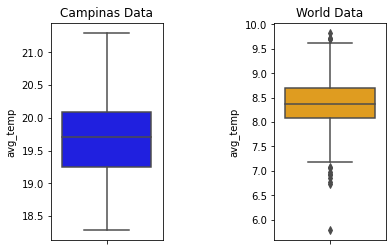

In [29]:
fig,axs = plt.subplots(ncols = 2)

sns.boxplot(y=city['avg_temp'], ax= axs[0], color = 'blue').set_title('Campinas Data')

sns.boxplot(y=world['avg_temp'], ax= axs[1],color = 'orange').set_title('World Data')
plt.subplots_adjust(wspace = 1)


As we can see from the boxplot aboxe both seem to be normally distributed, without any drastic skewness, as seem from the symmetric boxplot.
However it is important to note the huge difference between temperatures: Campinas's avg temps are way above the upper whisker of the World Data's boxplot, in the upper echelon of **outliers**.Which makes sense, considering Brazil is a tropical country, traversed by the Equator.

What we are really interested in here is whether the temperature trends, or variations over the years is somewhat consistent between local and global data.


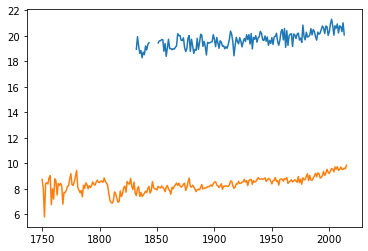

In [30]:
plt.plot(city['year'],city['avg_temp'])
plt.plot(world['year'],world['avg_temp'])
plt.show()

In the above preliminary analysis we can see Campinas data is only available from circa 1825 onwards.
Furthermore, the 7 missing years are in 1850's neighboring years.

---
Next we'll be creating a moving average column for both local and global data:

In [31]:
# 2 year SMA:
city['ma2']=city['avg_temp'].rolling(window=2).mean()
world['ma2']=world['avg_temp'].rolling(window=2).mean()
# 4 year SMA:
city['ma4']=city['avg_temp'].rolling(window=4).mean()
world['ma4']=world['avg_temp'].rolling(window=4).mean()
# 10 year SMA:
city['ma10']=city['avg_temp'].rolling(window=10).mean()
world['ma10']=world['avg_temp'].rolling(window=10).mean()
# 20 year SMA:
city['ma20']=city['avg_temp'].rolling(window=20).mean()
world['ma20']=world['avg_temp'].rolling(window=20).mean()

In [32]:
city.head(10)

,year,city,country,avg_temp,ma2,ma4,ma10,ma20
0,1832,Campinas,Brazil,18.94,NaN,NaN,NaN,NaN
1,1833,Campinas,Brazil,19.93,19.435,NaN,NaN,NaN
2,1834,Campinas,Brazil,19.21,19.570,NaN,NaN,NaN
3,1835,Campinas,Brazil,18.62,18.915,19.1750,NaN,NaN
4,1836,Campinas,Brazil,18.84,18.730,19.1500,NaN,NaN
5,1837,Campinas,Brazil,18.28,18.560,18.7375,NaN,NaN
6,1838,Campinas,Brazil,18.72,18.500,18.6150,NaN,NaN
7,1839,Campinas,Brazil,18.52,18.620,18.5900,NaN,NaN
8,1840,Campinas,Brazil,19.20,18.860,18.6800,NaN,NaN
9,1841,Campinas,Brazil,18.89,19.045,18.8325,18.915,NaN


In [33]:
world.head(10)

,year,avg_temp,ma2,ma4,ma10,ma20
0,1750,8.72,NaN,NaN,NaN,NaN
1,1751,7.98,8.350,NaN,NaN,NaN
2,1752,5.78,6.880,NaN,NaN,NaN
3,1753,8.39,7.085,7.7175,NaN,NaN
4,1754,8.47,8.430,7.6550,NaN,NaN
5,1755,8.36,8.415,7.7500,NaN,NaN
6,1756,8.85,8.605,8.5175,NaN,NaN
7,1757,9.02,8.935,8.6750,NaN,NaN
8,1758,6.74,7.880,8.2425,NaN,NaN
9,1759,7.99,7.365,8.1500,8.03,NaN


Furthermore, as the overall temperature between world and brazilian cities widely differ, I'm interested in creating an extra column to compare **variation over the years**, which would give better means of getting insight into how the local trend compares to the global.

In [34]:
city['% variation'] = city['avg_temp'].pct_change()
world['% variation'] = world['avg_temp'].pct_change()

In [35]:
city.head()

,year,city,country,avg_temp,ma2,ma4,ma10,ma20,% variation
0,1832,Campinas,Brazil,18.94,NaN,NaN,NaN,NaN,NaN
1,1833,Campinas,Brazil,19.93,19.435,NaN,NaN,NaN,0.052270
2,1834,Campinas,Brazil,19.21,19.570,NaN,NaN,NaN,-0.036126
3,1835,Campinas,Brazil,18.62,18.915,19.175,NaN,NaN,-0.030713
4,1836,Campinas,Brazil,18.84,18.730,19.150,NaN,NaN,0.011815


In [36]:
world.head()

,year,avg_temp,ma2,ma4,ma10,ma20,% variation
0,1750,8.72,NaN,NaN,NaN,NaN,NaN
1,1751,7.98,8.350,NaN,NaN,NaN,-0.084862
2,1752,5.78,6.880,NaN,NaN,NaN,-0.275689
3,1753,8.39,7.085,7.7175,NaN,NaN,0.451557
4,1754,8.47,8.430,7.6550,NaN,NaN,0.009535


___
## Plotting Avg Temperature:

Text(0.5, 0, 'Years')

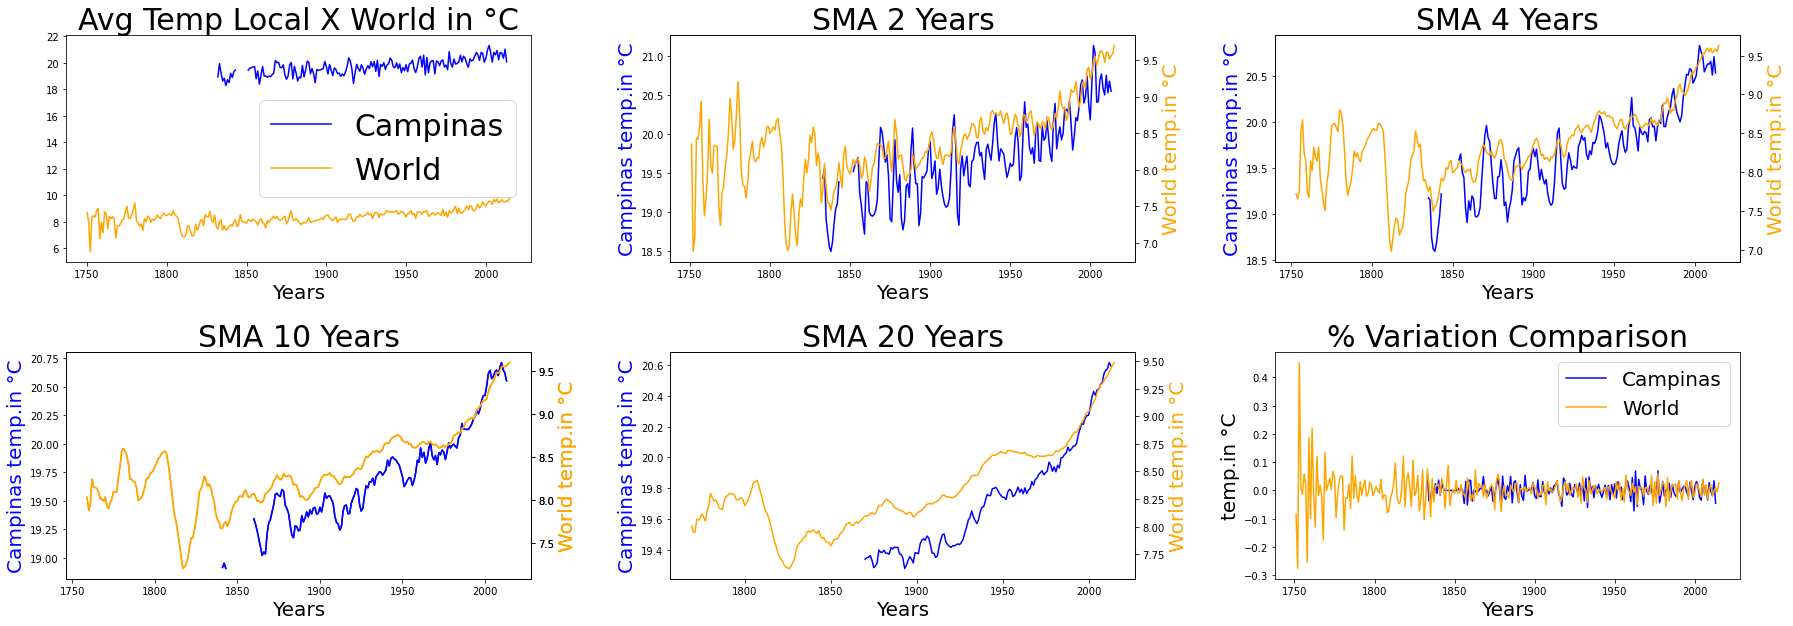

In [37]:
figure,axis = plt.subplots(2,3, figsize=(30,10))
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.4)


axis[0,0].plot(city['year'],city['avg_temp'],label = 'Campinas', color = 'blue')
axis[0,0].plot(world['year'],world['avg_temp'], label = 'World',color = 'orange')
axis[0,0].legend(fontsize=30)
axis[0,0].set_title('Avg Temp Local X World in °C', fontsize=30)
axis[0,0].set_xlabel('Years', fontsize=20)

axis[0,1].plot(city['year'],city['ma2'],label = 'Campinas', color = 'blue')
axis[0,1].set_ylabel('Campinas temp.in °C', color = 'blue', fontsize= 20)
ax2 = axis[0,1].twinx()
ax2.plot(world['year'],world['ma2'], label = 'World', color = 'orange')
ax2.set_ylabel('World temp.in °C',color = 'orange', fontsize=20)
axis[0,1].set_title('SMA 2 Years', fontsize=30)
axis[0,1].set_xlabel('Years', fontsize=20)

axis[0,2].plot(city['year'],city['ma4'],label = 'Campinas', color = 'blue')
axis[0,2].set_ylabel('Campinas temp.in °C', color = 'blue', fontsize= 20)
ax2 = axis[0,2].twinx()
ax2.plot(world['year'],world['ma4'], label = 'World', color = 'orange')
ax2.set_ylabel('World temp.in °C',color = 'orange', fontsize=20)
axis[0,2].set_title('SMA 4 Years', fontsize=30)
axis[0,2].set_xlabel('Years', fontsize=20)

axis[1,0].plot(city['year'],city['ma10'],label = 'Campinas', color = 'blue')
axis[1,0].set_ylabel('Campinas temp.in °C', color = 'blue', fontsize= 20)
ax2 = axis[1,0].twinx()
ax2.plot(world['year'],world['ma10'], label = 'World', color = 'orange')
ax2.set_ylabel('World temp.in °C',color = 'orange', fontsize=20)
axis[1,0].set_title('SMA 10 Years', fontsize=30)
axis[1,0].set_xlabel('Years', fontsize=20)

axis[1,0].plot(city['year'],city['ma10'],label = 'Campinas', color = 'blue')
axis[1,0].set_ylabel('Campinas temp.in °C', color = 'blue', fontsize= 20)
ax2 = axis[1,0].twinx()
ax2.plot(world['year'],world['ma10'], label = 'World', color = 'orange')
ax2.set_ylabel('World temp.in °C',color = 'orange', fontsize=20)
axis[1,0].set_title('SMA 10 Years', fontsize=30)
axis[1,0].set_xlabel('Years', fontsize=20)

axis[1,1].plot(city['year'],city['ma20'],label = 'Campinas', color = 'blue')
axis[1,1].set_ylabel('Campinas temp.in °C', color = 'blue', fontsize= 20)
ax2 = axis[1,1].twinx()
ax2.plot(world['year'],world['ma20'], label = 'World', color = 'orange')
ax2.set_ylabel('World temp.in °C',color = 'orange', fontsize=20)
axis[1,1].set_title('SMA 20 Years', fontsize=30)
axis[1,1].set_xlabel('Years', fontsize=20)

axis[1,2].plot(city['year'],city['% variation'],label = 'Campinas', color = 'blue')
axis[1,2].plot(world['year'],world['% variation'], label = 'World', color = 'orange')
axis[1,2].legend(fontsize=20)
axis[1,2].set_title('% Variation Comparison', fontsize=30)
axis[1,2].set_ylabel('temp.in °C', fontsize=20)
axis[1,2].set_xlabel('Years', fontsize=20)

---
## Can we predict Campinas' temperature based on the world temperature?

In [38]:
# Replacing NaNs with Average and assigning:

world['avg_temp'].fillna(world['avg_temp'].mean(), inplace= True)
x = world[(world['year']>= 1832) & (world['year']<= 2013)]['avg_temp'] # to match city data

city['avg_temp'].fillna(city[ 'avg_temp'].mean(), inplace = True)
y = city['avg_temp']



# Converting to column and fitting to lin regression:
x = np.array(x).reshape(-1,1)
y = np.array (y).reshape(-1,1)
model = LinearRegression().fit(x,y)

r_sq = model.score(x,y)
b0 = model.intercept_
b1 = model.coef_

print(f"R² = {r_sq}, thus {int(r_sq*100)}% of local temp variance is explained by global.\n")
print(f"beta 0 = {b0}\n")
print(f"beta 1 = {b1}\n")

R² = 0.600175090988603, thus 60% of local temp variance is explained by global.

beta 0 = [11.98649245]

beta 1 = [[0.90893532]]



We can then make preditions on local data based on global:

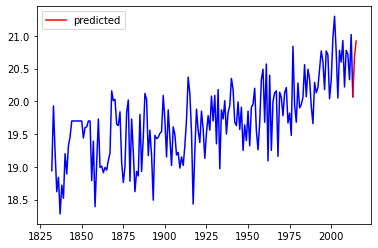

In [39]:
x_new = world[world['year']>2013]['avg_temp'].to_numpy().reshape(-1,1) # as we don't have 2014 and 2015 observations for Campinas
y_pred = model.predict(x_new)
y_pred = y_pred.reshape(1,-1)
last = np.array(20.07)
y_pred= np.append(last,y_pred)


plt.plot(city['year'],city['avg_temp'],color = 'blue')
plt.plot([2013,2014,2015],y_pred,label='predicted',color = 'red')
plt.legend()


The red line are the years 2014 and 2015's temperatures predicted from the global.

---
## Can we predict Campinas' temperature based on other brazilian cities'data?

In [40]:
other = pd.read_csv('Other_Cities.csv') # Done in SQL Query
other['avg'].fillna(other['avg'].mean(), inplace= True) # substituting NaNs for the mean



x = other[other['year'] >= 1832]['avg'] #to match city data
y= city['avg_temp']


x = np.array(x).reshape(-1,1)
y = np.array (y).reshape(-1,1)
model = LinearRegression().fit(x,y)

r_sq = model.score(x,y)
b0 = model.intercept_
b1 = model.coef_

print(f"R² = {r_sq}, thus {int(r_sq*100)}% of campinas temp variance is explained by other brazilian cities variation.\n")
print(f"beta 0 = {b0}\n")
print(f"beta 1 = {b1}\n")

R² = 0.36672340070028464, thus 36% of campinas temp variance is explained by other brazilian cities variation.

beta 0 = [12.54295573]

beta 1 = [[0.32493285]]



## Conclusions:
* The level of yearly avg temperature is consistently higher in Campinas than the world. As per the above exposed boxplot makes clear, which is consistent with Brazil's status as a warm tropical country.
* The 2 and 4 Years moving avg does not smooth the data enough for us to draw conclusions.
* The SMA 10 and 20 Years depict what seems like to be a conformity with global tendencies. It is noteworthy that the axis have different scales.
* In order to address the above issue that arises due to the stark difference in avg temperature levels the last chart compares the yearly ***variation*** of avg temperatures between Campinas and the world, which seems to be more adequate given the difference in magnitude. We can clearly see that Campinas seems to follow the global yearly average temperature variation trends over the period, with the exception of the last years, in which we can see them varying noticeably in opposite directions.
* It is possible to roughly predict Campina's future avg temperature per year using Global Data as proxy, although the *R² = 60%* signals that the global avg temperature explains a moderate amount of Campina's local temperature variation.
* Opposite to my hypothesis, trying to predit Campina's temperature using other brazilian cities yearly temperature average as a proxy does NOT improve upon the above, yielding a low *R² = 36%*.